In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Pelican.csv', delimiter=';') 

In [3]:
df.head()

,Customer,Method of Payment,Items,Discount,Sales,Gender,Marital Status,Age,Desconto?,Desconto?.1
0,1,Discover,1,0.0,39.5,Male,Married,32,Não,Não
1,2,Proprietary Card,1,25.6,102.4,Female,Married,36,Sim,Sim
2,3,Proprietary Card,1,0.0,22.5,Female,Married,32,Não,Não
3,4,Proprietary Card,5,121.1,100.4,Female,Married,28,Sim,Sim
4,5,Mastercard,2,0.0,54.0,Female,Married,34,Não,Não


In [4]:
df['Desconto'] =  np.where(df['Discount '] == 0 , 0, 1)

In [5]:
df.head()

,Customer,Method of Payment,Items,Discount,Sales,Gender,Marital Status,Age,Desconto?,Desconto?.1,Desconto
0,1,Discover,1,0.0,39.5,Male,Married,32,Não,Não,0
1,2,Proprietary Card,1,25.6,102.4,Female,Married,36,Sim,Sim,1
2,3,Proprietary Card,1,0.0,22.5,Female,Married,32,Não,Não,0
3,4,Proprietary Card,5,121.1,100.4,Female,Married,28,Sim,Sim,1
4,5,Mastercard,2,0.0,54.0,Female,Married,34,Não,Não,0


In [6]:
#np.where??

In [7]:
#1 - Distribuicao de frequencia percentual para as variaveis chave.

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer,100.0,50.5000,29.011492,1.00,25.75,50.500,75.25,100.00
Items,100.0,3.2200,2.736140,1.00,1.00,2.000,4.00,17.00
Discount,100.0,22.4518,28.381720,0.00,0.00,15.000,31.25,158.30
Sales,100.0,77.6005,55.664938,13.23,39.60,59.705,100.90,287.59
Age,100.0,43.0800,12.389047,20.00,32.00,42.000,50.00,78.00
Desconto,100.0,0.7000,0.460566,0.00,0.00,1.000,1.00,1.00


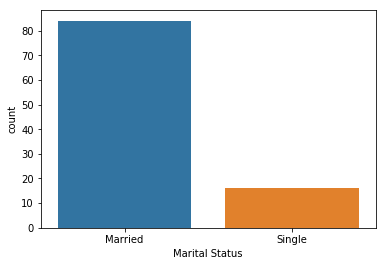

In [9]:
Marital_status = sns.countplot(df['Marital Status'])


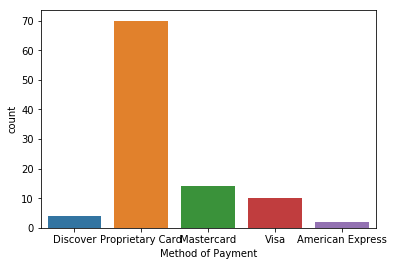

In [10]:
Payment = sns.countplot(df['Method of Payment'])

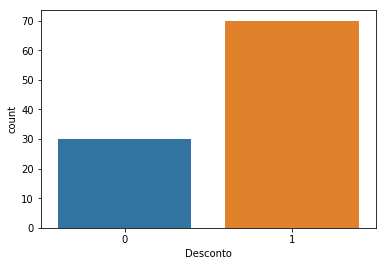

In [11]:
Discount = sns.countplot(df['Desconto'])

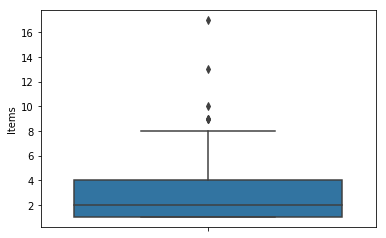

In [12]:
sns.boxplot(data=df,x="Items",orient="v")

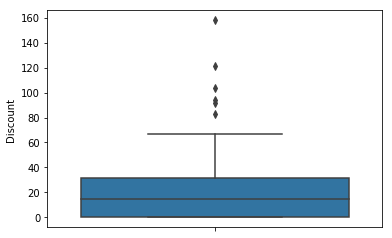

In [13]:
sns.boxplot(data=df,x="Discount ",orient="v")

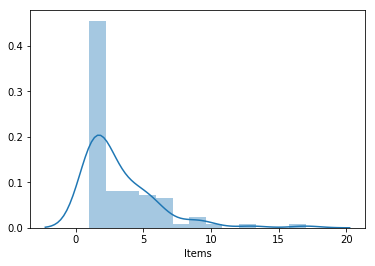

In [14]:
sns.distplot(df['Items'])


In [15]:
pd.crosstab(index = df['Gender'], columns=['count'])               


col_0,count
Gender,
Female,93
Male,7


In [16]:
pd.crosstab(index = df['Desconto?'], columns=['count'])    

col_0,count
Desconto?,
Não,30
Sim,70


In [17]:
df.groupby('Marital Status').mean()

,Customer,Items,Discount,Sales,Age,Desconto
Marital Status,,,,,,
Married,50.666667,3.357143,23.421310,78.029048,44.500,0.72619
Single,49.625000,2.500000,17.361875,75.350625,35.625,0.56250


In [18]:
df[['Items','Discount ','Sales','Marital Status','Desconto']].groupby('Marital Status').sum()

,Items,Discount,Sales,Desconto
Marital Status,,,,
Married,282,1967.39,6554.44,61
Single,40,277.79,1205.61,9


In [19]:
a = np.sort(df.Age)
bins =  np.arange(df.Age.min(),df.Age.max(),10)
ind = np.digitize(df['Age'],bins)

In [20]:
#df[['Items','Discount ','Sales','Age']].groupby('', by=bins).mean()

df[['Items','Discount ','Sales', 'Desconto']].groupby(pd.cut(df["Age"], np.arange(df.Age.min(),df.Age.max(),10))).sum()

,Items,Discount,Sales,Desconto
Age,,,,
"(20, 30]",69,634.34,1605.81,14
"(30, 40]",66,470.53,1675.96,16
"(40, 50]",107,598.26,2529.49,21
"(50, 60]",55,382.81,1220.28,11
"(60, 70]",14,137.06,359.94,6


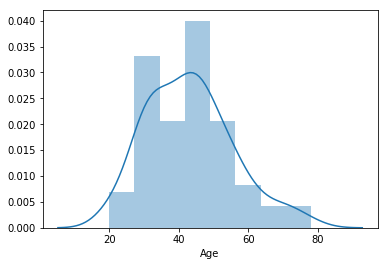

In [21]:
sns.distplot(df['Age'])


In [22]:
df[['Items','Discount ','Sales', 'Desconto']].groupby('Desconto').sum()

,Items,Discount,Sales
Desconto,,,
0,56,0.00,1859.75
1,266,2245.18,5900.30


In [53]:
df['age_bin'] = pd.cut(df["Age"], np.arange(df.Age.min()-10,df.Age.max()+10,10)) 

In [77]:
df[['Items','Discount ','Sales', 'Desconto', 'age_bin']].groupby(['Desconto', 'age_bin']).agg([np.count_nonzero,np.sum, np.mean, np.std])



Items                             Discount           \
                  count_nonzero sum      mean       std count_nonzero     sum   
Desconto age_bin                                                                
0        (10, 20]             1   2  2.000000       NaN           0.0    0.00   
         (20, 30]             2   2  1.000000  0.000000           0.0    0.00   
         (30, 40]            10  17  1.700000  1.059350           0.0    0.00   
         (40, 50]            11  23  2.090909  1.445998           0.0    0.00   
         (50, 60]             4   6  1.500000  0.577350           0.0    0.00   
         (70, 80]             2   6  3.000000  2.828427           0.0    0.00   
1        (10, 20]             1   1  1.000000       NaN           1.0    7.90   
         (20, 30]            14  67  4.785714  4.079566          14.0  634.34   
         (30, 40]            16  49  3.062500  2.080665          16.0  470.53   
         (40, 50]            21  84  4.000000  2.983287          21.0  598.26   
         (50, 60]            11  49  4.454545  3.012097          11.0  382.81   
         (60, 70]             6  14  2.333333  1.751190           6.0  137.06   
         (70, 80]             1   2  2.000000       NaN           1.0   14.28   

                                                Sales                       \
                        mean        std count_nonzero      sum        mean   
Desconto age_bin                                                             
0        (10, 20]   0.000000        NaN           1.0    74.00   74.000000   
         (20, 30]   0.000000   0.000000           2.0   118.50   59.250000   
         (30, 40]   0.000000   0.000000          10.0   463.50   46.350000   
         (40, 50]   0.000000   0.000000          11.0   725.00   65.909091   
         (50, 60]   0.000000   0.000000           4.0   261.00   65.250000   
         (70, 80]   0.000000   0.000000           2.0   217.75  108.875000   
1        (10, 20]   7.900000        NaN           1.0    31.60   31.600000   
         (20, 30]  45.310000  32.614674          14.0  1487.31  106.236429   
         (30, 40]  29.408125  24.193430          16.0  1212.46   75.778750   
         (40, 50]  28.488571  22.473219          21.0  1804.49   85.928095   
         (50, 60]  34.800909  43.469683          11.0   959.28   87.207273   
         (60, 70]  22.843333  21.011998           6.0   359.94   59.990000   
         (70, 80]  14.280000        NaN           1.0    45.22   45.220000   

                              
                         std  
Desconto age_bin              
0        (10, 20]        NaN  
         (20, 30]  13.788582  
         (30, 40]  24.325398  
         (40, 50]  40.626850  
         (50, 60]  20.430777  
         (70, 80]  71.948115  
1        (10, 20]        NaN  
         (20, 30]  67.611792  
         (30, 40]  47.646718  
         (40, 50]  66.327822  
         (50, 60]  74.282565  
         (60, 70]  40.274823  
         (70, 80]        NaN

In [72]:
??np.mean

In [76]:
??np.count_nonzero